Code : Importing Libraries

In [368]:
# performing linear algebra
import numpy as np
# data processing
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

Code : Loading dataset

In [369]:
df = pd.read_csv("data.csv")
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [370]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Code: Data Info

In [371]:
data=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Code: We are dropping columns – ‘id’ 'diagnosis' and ‘Unnamed: 32’ as they have no role in prediction

In [372]:
df.drop(['Unnamed: 32', 'id','diagnosis'], axis = 1)
df.dropna(axis=1,inplace=True)
print(df.shape)

(569, 32)


Code: Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [373]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 0
    else:
        return 1
  
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)

# Radius Mean vs Texture Mean

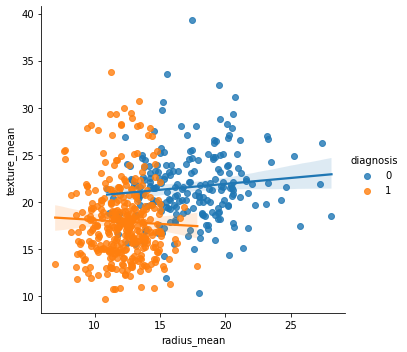

In [374]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)


# Smoothness Mean vs Compactness Mean

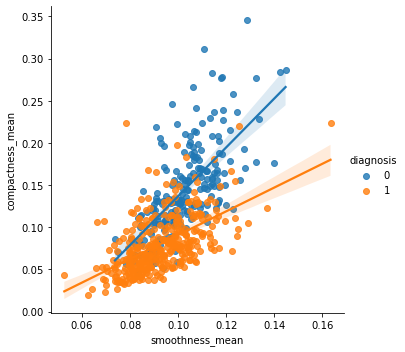

In [375]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis')

In [376]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

Code : Splitting data to training and testing

# Testing Size

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2)

# Choosing K Value

In [378]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

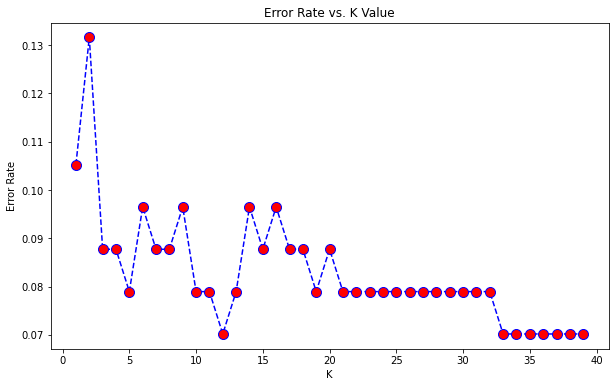

In [379]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [380]:
knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

Code : Prediction Score

In [381]:
knn.score(X_test, y_test)

0.9210526315789473

# Training and Testing Accuracy

In [382]:
x_train_prediction=knn.predict(X_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9362637362637363


In [383]:
x_test_prediction=knn.predict(X_test)
test_data_accuracy=accuracy_score(y_test, x_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9210526315789473


Code : Misclassification error versus k

# Prediction Result

In [384]:


#input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.07,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368)

input_data=(13.08,15.71,85.63,1.23,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

print(type(input_data))
print(type(input_data_reshaped ))


[1]
The Breast Cancer is Benign
<class 'tuple'>
<class 'numpy.ndarray'>
